In [ ]:
### DECODING NUMBERS FROM ECoG - AMY'S DATA

In [10]:
%matplotlib inline 
# Import needed libraries
import sys 
#sys.path.append('/neurospin/meg/meg_tmp/Calculation_Pedro_2014/scripts/decoding')
sys.path.append('/Users/pinheirochagas/Pedro/NeuroSpin/Experiments/Calc_MEG/scripts_git/Calc_MEG/decoding/')
from ecog2mne_calculia import ecog2mne_calculia
import numpy as np
from calc_classification import calc_classification
from jr.plot import pretty_gat, pretty_decod
from jr_tweaked.plot import pretty_gat, pretty_decod
import mne
from mne.decoding import GeneralizationAcrossTime
from scipy.stats import itemfreq
import random
import matplotlib.pyplot as plt
import scipy.io as sio


In [2]:
### Let's start by subject 64, who showed a nice response in NFA 
# Define directories and data name
result_path = '/Volumes/NeuroSpin2T/Calc_ECoG/analysis_ECoG/neuralData/SpecData/S13_57_TVD/decoding/'
fname_ecog = '/Volumes/NeuroSpin2T/Calc_ECoG/analysis_ECoG/neuralData/SpecData/S13_57_TVD/data_fieldtrip/S13_57_TVD_context.mat'
# Load data 
epoch_calc,info_calc = ecog2mne_calculia(fname_ecog, 'data', 'context')

#result_path = '/Volumes/NeuroSpin2T/Calculia/validdata/S16_94_DR/data_fieldtrip/decoding/'
#fname_ecog = '/Volumes/NeuroSpin2T/Calculia/validdata/S16_94_DR/data_fieldtrip/S16_94_DR_selected.mat'

In [3]:
### Baseline correction and downsampling
#baseline = (-0.5, -0.05) #time for the baseline period
#epoch_calc.apply_baseline(baseline)

downsampling = 2
epoch_calc.decimate(downsampling)

The measurement information indicates a low-pass frequency of 254.313 Hz. The decim=2 parameter will result in a sampling frequency of 254.313 Hz, which can cause aliasing artifacts.


/Users/pinheirochagas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: The measurement information indicates a low-pass frequency of 254.313 Hz. The decim=2 parameter will result in a sampling frequency of 254.313 Hz, which can cause aliasing artifacts.


<EpochsArray  |  n_events : 96 (all good), tmin : -0.200540016253 (s), tmax : 6.49592366372 (s), baseline : None>

In [ ]:
#Let's first see if we can decode operand 1

In [ ]:
# Let's start with all channels 


In [4]:
#Define decoding parameters
trainTimes = {'start': -0.2, 'stop': 5}
testTimes = {'start': -0.2, 'stop': 5}
params = {'trainTimes': trainTimes, 'testTimes': testTimes}

In [5]:
# Select the number of trials and the channels
epoch_calcS = epoch_calc # copy the data
info_calcS = info_calc

# # Randomly select 122 calculation trials (just to make sure that the decoding is working with balanced classes)
# freqConditions = itemfreq(info_calc['isCalc'])
# isCalcIdx = np.where(info_calc['isCalc']==1)[0]
# isCalcIdx = random.sample(isCalcIdx, 122)
# isCalcIdxAll = np.concatenate((isCalcIdx,np.where(info_calc['isCalc']==0)[0]))

# # Rewrite the epochs
# epoch_calcS = epoch_calcS[isCalcIdxAll]
# info_calcS = info_calc.iloc[isCalcIdxAll]

In [ ]:
# Select some channels
chan_list = epoch_calcS.ch_names


# epoch_calcS.pick_channels(chan_list[0:36])

In [ ]:
chan_list

In [ ]:
epoch_calcS.drop_channels(chan_list[18:19])

In [ ]:
# Plot evoked responses just to check
condA = info_calcS['operand1'] <10
evoked_condA = epoch_calcS[condA].average() # condA = info_calc['isCalc'] == 1
evoked_condA.plot()




In [6]:
# Train and test data
train_index = (info_calcS['operand1'] < 20) # all trials
X_train = epoch_calcS[train_index]
y_train = np.array(info_calcS[train_index]['operand1'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
mode = 'cross-validation'
params.update({'mode': mode})

In [7]:
# Run GAT decoding and save results
gat, score, diagonal = calc_classification(X_train, y_train, X_test, y_test, params)
results = {'params': params, 'times_calc': epoch_calc.times, 'score': score, 'diagonal': diagonal, 'y_train': y_train, 'y_test': y_test}
fname = result_path + 'decoding_operand1_context'
np.save(fname, results)

[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   10.9s finished
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  8.6min finished
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  4.6min finished


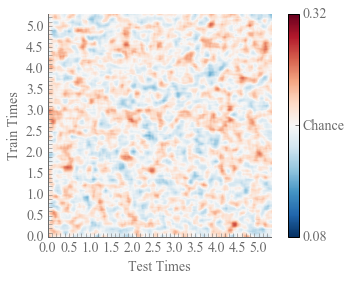

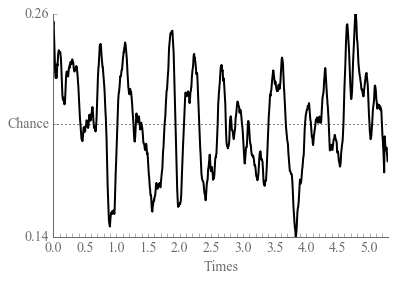

In [13]:
# Plot results 
pretty_gat(score, chance=.2, smoothWindow=15)
ax = plt.gca()
# ax.axvline(.7, color='k',linestyle='dashed') 
# ax.axvline(1, color='k',linestyle='dotted')    
# ax.axvline(1.4, color='k',linestyle='dashed') 
# ax.axvline(1.9, color='k',linestyle='dotted')
# ax.axvline(2.4, color='k',linestyle='dashed') 
# ax.axvline(2.9, color='k',linestyle='dotted')
# ax.axvline(3.4, color='k',linestyle='dashed') 
# ax.axvline(3.9, color='k',linestyle='dotted')
# ax.axvline(4.4, color='k',linestyle='dashed') 
# ax.axvline(4.9, color='k',linestyle='dotted')
plt.show()
pretty_decod(diagonal, chance =.2, smoothWindow=15)
ax = plt.gca()
# ax.axvline(.5, color='k',linestyle='dashed') 
# ax.axvline(1, color='k',linestyle='dotted')    
# ax.axvline(1.4, color='k',linestyle='dashed') 
# ax.axvline(1.9, color='k',linestyle='dotted')
# ax.axvline(2.4, color='k',linestyle='dashed') 
# ax.axvline(2.9, color='k',linestyle='dotted')
# ax.axvline(3.4, color='k',linestyle='dashed') 
# ax.axvline(3.9, color='k',linestyle='dotted')
# ax.axvline(4.4, color='k',linestyle='dashed') 
# ax.axvline(4.9, color='k',linestyle='dotted') 
plt.show()

In [14]:
# Train and test data
train_index = (info_calcS['operand1'] < 20) # all trials
X_train = epoch_calcS[train_index]
y_train = np.array(info_calcS[train_index]['operand2'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
mode = 'cross-validation'
params.update({'mode': mode})

In [ ]:
# Run GAT decoding and save results
gat, score, diagonal = calc_classification(X_train, y_train, X_test, y_test, params)
results = {'params': params, 'times_calc': epoch_calc.times, 'score': score, 'diagonal': diagonal, 'y_train': y_train, 'y_test': y_test}
fname = result_path + 'decoding_operand2_context'
np.save(fname, results)

In [ ]:
# Plot results 
pretty_gat(score, chance=., smoothWindow=15)
ax = plt.gca()
# ax.axvline(.7, color='k',linestyle='dashed') 
# ax.axvline(1, color='k',linestyle='dotted')    
# ax.axvline(1.4, color='k',linestyle='dashed') 
# ax.axvline(1.9, color='k',linestyle='dotted')
# ax.axvline(2.4, color='k',linestyle='dashed') 
# ax.axvline(2.9, color='k',linestyle='dotted')
# ax.axvline(3.4, color='k',linestyle='dashed') 
# ax.axvline(3.9, color='k',linestyle='dotted')
# ax.axvline(4.4, color='k',linestyle='dashed') 
# ax.axvline(4.9, color='k',linestyle='dotted')
plt.show()
pretty_decod(diagonal, chance =.5, smoothWindow=15)
ax = plt.gca()
# ax.axvline(.5, color='k',linestyle='dashed') 
# ax.axvline(1, color='k',linestyle='dotted')    
# ax.axvline(1.4, color='k',linestyle='dashed') 
# ax.axvline(1.9, color='k',linestyle='dotted')
# ax.axvline(2.4, color='k',linestyle='dashed') 
# ax.axvline(2.9, color='k',linestyle='dotted')
# ax.axvline(3.4, color='k',linestyle='dashed') 
# ax.axvline(3.9, color='k',linestyle='dotted')
# ax.axvline(4.4, color='k',linestyle='dashed') 
# ax.axvline(4.9, color='k',linestyle='dotted') 
plt.show()

In [ ]:
### Now let's focus on the VTC channels

In [ ]:
# Select the number of trials and the channels
epoch_calcS = epoch_calc # copy the data
info_calcS = info_calc

# Randomly select 122 calculation trials (just to make sure that the decoding is working with balanced classes)
freqConditions = itemfreq(info_calc['isCalc'])
isCalcIdx = np.where(info_calc['isCalc']==1)[0]
isCalcIdx = random.sample(isCalcIdx, 122)
isCalcIdxAll = np.concatenate((isCalcIdx,np.where(info_calc['isCalc']==0)[0]))

# Rewrite the epochs
epoch_calcS = epoch_calcS[isCalcIdxAll]
info_calcS = info_calc.iloc[isCalcIdxAll]

# Select some channels
chan_list = epoch_calcS.ch_names
epoch_calcS.pick_channels(chan_list[0:36])

In [ ]:
# Plot evoked responses just to check
condA = info_calcS['isCalc'] == 1
condB = info_calcS['isCalc'] == 0
evoked_condA = epoch_calcS[condA].average() # condA = info_calc['isCalc'] == 1
evoked_condB = epoch_calcS[condB].average() # 
evoked_condA.plot()
evoked_condB.plot()

In [ ]:
# Train and test data
train_index = (info_calcS['isCalc'] < 10) # all trials
X_train = epoch_calcS[train_index]
y_train = np.array(info_calcS[train_index]['isCalc'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
mode = 'cross-validation'
params.update({'mode': mode})

In [ ]:
# Run GAT decoding and save results
gat, score, diagonal = calc_classification(X_train, y_train, X_test, y_test, params)
results = {'params': params, 'times_calc': epoch_calc.times, 'score': score, 'diagonal': diagonal, 'y_train': y_train, 'y_test': y_test}
fname = result_path + 'decoding_iscalc_VTC'
np.save(fname, results)

In [ ]:
fnameLoad = result_path + 'decoding_iscalc_VTC.npy'
results_load = np.load(fnameLoad)
results_load = results_load.tolist()
score = results_load['score']
diagonal = results_load['diagonal']

In [ ]:
# Plot results 
pretty_gat(score, chance=.5, smoothWindow=15)
ax = plt.gca()
ax.axvline(.5, color='k',linestyle='dashed') 
ax.axvline(1, color='k',linestyle='dotted')    
ax.axvline(1.4, color='k',linestyle='dashed') 
ax.axvline(1.9, color='k',linestyle='dotted')
ax.axvline(2.4, color='k',linestyle='dashed') 
ax.axvline(2.9, color='k',linestyle='dotted')
ax.axvline(3.4, color='k',linestyle='dashed') 
ax.axvline(3.9, color='k',linestyle='dotted')
ax.axvline(4.4, color='k',linestyle='dashed') 
ax.axvline(4.9, color='k',linestyle='dotted')
plt.show()
pretty_decod(diagonal, chance =.5, smoothWindow=15)
ax = plt.gca()
ax.axvline(.5, color='k',linestyle='dashed') 
ax.axvline(1, color='k',linestyle='dotted')    
ax.axvline(1.4, color='k',linestyle='dashed') 
ax.axvline(1.9, color='k',linestyle='dotted')
ax.axvline(2.4, color='k',linestyle='dashed') 
ax.axvline(2.9, color='k',linestyle='dotted')
ax.axvline(3.4, color='k',linestyle='dashed') 
ax.axvline(3.9, color='k',linestyle='dotted')
ax.axvline(4.4, color='k',linestyle='dashed') 
ax.axvline(4.9, color='k',linestyle='dotted') 
plt.show()

In [ ]:
# Now let's focus on channel 8

In [ ]:
# Select the number of trials and the channels
epoch_calcS = epoch_calc # copy the data
info_calcS = info_calc

# Randomly select 122 calculation trials (just to make sure that the decoding is working with balanced classes)
freqConditions = itemfreq(info_calc['isCalc'])
isCalcIdx = np.where(info_calc['isCalc']==1)[0]
isCalcIdx = random.sample(isCalcIdx, 122)
isCalcIdxAll = np.concatenate((isCalcIdx,np.where(info_calc['isCalc']==0)[0]))

# Rewrite the epochs
epoch_calcS = epoch_calcS[isCalcIdxAll]
info_calcS = info_calc.iloc[isCalcIdxAll]

# Select some channels
chan_list = epoch_calcS.ch_names
epoch_calcS.pick_channels(['S14_64_SP_008'])

In [ ]:
# Plot evoked responses just to check
condA = info_calcS['isCalc'] == 1
condB = info_calcS['isCalc'] == 0
evoked_condA = epoch_calcS[condA].average() # condA = info_calc['isCalc'] == 1
evoked_condB = epoch_calcS[condB].average() # 
evoked_condA.plot()
evoked_condB.plot()

In [ ]:
# Train and test data
train_index = (info_calcS['isCalc'] < 10) # all trials
X_train = epoch_calcS[train_index]
y_train = np.array(info_calcS[train_index]['isCalc'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
mode = 'cross-validation'
params.update({'mode': mode})

In [ ]:
# Run GAT decoding and save results
gat, score, diagonal = calc_classification(X_train, y_train, X_test, y_test, params)
results = {'params': params, 'times_calc': epoch_calc.times, 'score': score, 'diagonal': diagonal, 'y_train': y_train, 'y_test': y_test}
fname = result_path + 'decoding_iscalc_channel8'
np.save(fname, results)

In [ ]:
# Plot results 
pretty_gat(score, chance=.5,smoothWindow=15)
ax = plt.gca()
ax.axvline(.5, color='k',linestyle='dashed') 
ax.axvline(1, color='k',linestyle='dotted')    
ax.axvline(1.4, color='k',linestyle='dashed') 
ax.axvline(1.9, color='k',linestyle='dotted')
ax.axvline(2.4, color='k',linestyle='dashed') 
ax.axvline(2.9, color='k',linestyle='dotted')
ax.axvline(3.4, color='k',linestyle='dashed') 
ax.axvline(3.9, color='k',linestyle='dotted')
ax.axvline(4.4, color='k',linestyle='dashed') 
ax.axvline(4.9, color='k',linestyle='dotted')
plt.show()
pretty_decod(diagonal, chance =.5, smoothWindow=15)
ax = plt.gca()
ax.axvline(.5, color='k',linestyle='dashed') 
ax.axvline(1, color='k',linestyle='dotted')    
ax.axvline(1.4, color='k',linestyle='dashed') 
ax.axvline(1.9, color='k',linestyle='dotted')
ax.axvline(2.4, color='k',linestyle='dashed') 
ax.axvline(2.9, color='k',linestyle='dotted')
ax.axvline(3.4, color='k',linestyle='dashed') 
ax.axvline(3.9, color='k',linestyle='dotted')
ax.axvline(4.4, color='k',linestyle='dashed') 
ax.axvline(4.9, color='k',linestyle='dotted') 
plt.show()

In [ ]:
# Now let's remove channel 8 from the VTC

In [ ]:
# Select the number of trials and the channels
epoch_calcS = epoch_calc # copy the data
info_calcS = info_calc

# Randomly select 122 calculation trials (just to make sure that the decoding is working with balanced classes)
freqConditions = itemfreq(info_calc['isCalc'])
isCalcIdx = np.where(info_calc['isCalc']==1)[0]
isCalcIdx = random.sample(isCalcIdx, 122)
isCalcIdxAll = np.concatenate((isCalcIdx,np.where(info_calc['isCalc']==0)[0]))

# Rewrite the epochs
epoch_calcS = epoch_calcS[isCalcIdxAll]
info_calcS = info_calc.iloc[isCalcIdxAll]

# Select some channels
chan_list = epoch_calcS.ch_names
epoch_calcS.pick_channels(chan_list[0:36])
epoch_calcS.drop_channels(chan_list[7:8])

In [ ]:
# Plot evoked responses just to check
condA = info_calcS['isCalc'] == 1
condB = info_calcS['isCalc'] == 0
evoked_condA = epoch_calcS[condA].average() # condA = info_calc['isCalc'] == 1
evoked_condB = epoch_calcS[condB].average() # 
evoked_condA.plot()
evoked_condB.plot()

In [ ]:
# Train and test data
train_index = (info_calcS['isCalc'] < 10) # all trials
X_train = epoch_calcS[train_index]
y_train = np.array(info_calcS[train_index]['isCalc'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
mode = 'cross-validation'
params.update({'mode': mode})

In [ ]:
# Run GAT decoding and save results
gat, score, diagonal = calc_classification(X_train, y_train, X_test, y_test, params)
results = {'params': params, 'times_calc': epoch_calc.times, 'score': score, 'diagonal': diagonal, 'y_train': y_train, 'y_test': y_test}
fname = result_path + 'decoding_iscalc_VTC_except8.npy'
np.save(fname, results)

In [ ]:
# Plot results 
pretty_gat(score, chance=.5, smoothWindow=15)
ax = plt.gca()
ax.axvline(.5, color='k',linestyle='dashed') 
ax.axvline(1, color='k',linestyle='dotted')    
ax.axvline(1.4, color='k',linestyle='dashed') 
ax.axvline(1.9, color='k',linestyle='dotted')
ax.axvline(2.4, color='k',linestyle='dashed') 
ax.axvline(2.9, color='k',linestyle='dotted')
ax.axvline(3.4, color='k',linestyle='dashed') 
ax.axvline(3.9, color='k',linestyle='dotted')
ax.axvline(4.4, color='k',linestyle='dashed') 
ax.axvline(4.9, color='k',linestyle='dotted')
plt.show()
pretty_decod(diagonal, chance =.5, smoothWindow=15)
ax = plt.gca()
ax.axvline(.5, color='k',linestyle='dashed') 
ax.axvline(1, color='k',linestyle='dotted')    
ax.axvline(1.4, color='k',linestyle='dashed') 
ax.axvline(1.9, color='k',linestyle='dotted')
ax.axvline(2.4, color='k',linestyle='dashed') 
ax.axvline(2.9, color='k',linestyle='dotted')
ax.axvline(3.4, color='k',linestyle='dashed') 
ax.axvline(3.9, color='k',linestyle='dotted')
ax.axvline(4.4, color='k',linestyle='dashed') 
ax.axvline(4.9, color='k',linestyle='dotted') 
plt.show()


In [ ]:
# Now let's try with only the first 3 runs

In [ ]:
# Select the number of trials and the channels
epoch_calcS = epoch_calc # copy the data
info_calcS = info_calc

selecIdx = info_calcS['run'] < 16
epoch_calcS = epoch_calcS[selecIdx]
info_calcS = info_calcS[selecIdx]

# Randomly select 122 calculation trials (just to make sure that the decoding is working with balanced classes)
freqConditions = itemfreq(info_calcS['isCalc'])
isCalcIdx = np.where(info_calcS['isCalc']==1)[0]
isCalcIdx = random.sample(isCalcIdx, 42)
isCalcIdxAll = np.concatenate((isCalcIdx,np.where(info_calcS['isCalc']==0)[0]))

# Rewrite the epochs
epoch_calcS = epoch_calcS[isCalcIdxAll]
info_calcS = info_calc.iloc[isCalcIdxAll]

# Select some channels
chan_list = epoch_calcS.ch_names
epoch_calcS.pick_channels(['S14_64_SP_008'])

In [ ]:
# Plot evoked responses just to check
condA = info_calcS['isCalc'] == 1
condB = info_calcS['isCalc'] == 0
evoked_condA = epoch_calcS[condA].average() # condA = info_calc['isCalc'] == 1
evoked_condB = epoch_calcS[condB].average() # 
evoked_condA.plot()
evoked_condB.plot()

In [ ]:
# Train and test data
train_index = (info_calcS['isCalc'] < 10) # all trials
X_train = epoch_calcS[train_index]
y_train = np.array(info_calcS[train_index]['isCalc'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
mode = 'cross-validation'
params.update({'mode': mode})

In [ ]:
# Run GAT decoding and save results
gat, score, diagonal = calc_classification(X_train, y_train, X_test, y_test, params)
results = {'params': params, 'times_calc': epoch_calc.times, 'score': score, 'diagonal': diagonal, 'y_train': y_train, 'y_test': y_test}
fname = result_path + 'decoding_iscalc_chan8_block1to3.npy'
np.save(fname, results)

In [ ]:
# Plot results 
pretty_gat(score, chance=.5, smoothWindow=15)
ax = plt.gca()
ax.axvline(.5, color='k',linestyle='dashed') 
ax.axvline(1, color='k',linestyle='dotted')    
ax.axvline(1.4, color='k',linestyle='dashed') 
ax.axvline(1.9, color='k',linestyle='dotted')
ax.axvline(2.4, color='k',linestyle='dashed') 
ax.axvline(2.9, color='k',linestyle='dotted')
ax.axvline(3.4, color='k',linestyle='dashed') 
ax.axvline(3.9, color='k',linestyle='dotted')
ax.axvline(4.4, color='k',linestyle='dashed') 
ax.axvline(4.9, color='k',linestyle='dotted')
plt.show()
pretty_decod(diagonal, chance =.5, smoothWindow=15)
ax = plt.gca()
ax.axvline(.5, color='k',linestyle='dashed') 
ax.axvline(1, color='k',linestyle='dotted')    
ax.axvline(1.4, color='k',linestyle='dashed') 
ax.axvline(1.9, color='k',linestyle='dotted')
ax.axvline(2.4, color='k',linestyle='dashed') 
ax.axvline(2.9, color='k',linestyle='dotted')
ax.axvline(3.4, color='k',linestyle='dashed') 
ax.axvline(3.9, color='k',linestyle='dotted')
ax.axvline(4.4, color='k',linestyle='dashed') 
ax.axvline(4.9, color='k',linestyle='dotted') 
plt.show()


In [ ]:
# Now let's try to decode operand 1 in all channels

In [ ]:
# Select the number of trials and the channels
epoch_calcS = epoch_calc # copy the data
info_calcS = info_calc

selecIdx = info_calcS['isCalc'] == 1
epoch_calcS = epoch_calcS[selecIdx]
info_calcS = info_calcS[selecIdx]

# Randomly select 122 calculation trials (just to make sure that the decoding is working with balanced classes)
freqConditions = itemfreq(info_calcS['operand1'])
isCalcIdx = np.where(info_calcS['isCalc']==1)[0]
isCalcIdx = random.sample(isCalcIdx, 42)
isCalcIdxAll = np.concatenate((isCalcIdx,np.where(info_calcS['isCalc']==0)[0]))

# Rewrite the epochs
epoch_calcS = epoch_calcS[isCalcIdxAll]
info_calcS = info_calc.iloc[isCalcIdxAll]

# Select some channels
chan_list = epoch_calcS.ch_names
epoch_calcS.pick_channels(['S14_64_SP_008'])

In [ ]:

freqConditions


In [ ]:
# Train and test data
train_index = (info_calcS['isCalc'] < 10) # all trials
X_train = epoch_calcS[train_index]
y_train = np.array(info_calcS[train_index]['operand1'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
mode = 'cross-validation'
params.update({'mode': mode})

In [ ]:
# Run GAT decoding and save results
gat, score, diagonal = calc_classification(X_train, y_train, X_test, y_test, params)
results = {'params': params, 'times_calc': epoch_calc.times, 'score': score, 'diagonal': diagonal, 'y_train': y_train, 'y_test': y_test}
fname = result_path + 'decoding_operand1_allchannels.npy'
np.save(fname, results)

In [ ]:
# Plot results 
pretty_gat(score, smoothWindow=15)
ax = plt.gca()
ax.axvline(.5, color='k',linestyle='dashed') 
ax.axvline(1, color='k',linestyle='dotted')    
ax.axvline(1.4, color='k',linestyle='dashed') 
ax.axvline(1.9, color='k',linestyle='dotted')
ax.axvline(2.4, color='k',linestyle='dashed') 
ax.axvline(2.9, color='k',linestyle='dotted')
ax.axvline(3.4, color='k',linestyle='dashed') 
ax.axvline(3.9, color='k',linestyle='dotted')
ax.axvline(4.4, color='k',linestyle='dashed') 
ax.axvline(4.9, color='k',linestyle='dotted')
plt.show()
pretty_decod(diagonal, smoothWindow=15)
ax = plt.gca()
ax.axvline(.5, color='k',linestyle='dashed') 
ax.axvline(1, color='k',linestyle='dotted')    
ax.axvline(1.4, color='k',linestyle='dashed') 
ax.axvline(1.9, color='k',linestyle='dotted')
ax.axvline(2.4, color='k',linestyle='dashed') 
ax.axvline(2.9, color='k',linestyle='dotted')
ax.axvline(3.4, color='k',linestyle='dashed') 
ax.axvline(3.9, color='k',linestyle='dotted')
ax.axvline(4.4, color='k',linestyle='dashed') 
ax.axvline(4.9, color='k',linestyle='dotted') 
plt.show()


In [ ]:
# Decoding operand1
X_train = epoch_calc
y_train = np.array(info_calc['isCalc'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
trainTimes = {'start': -0.1, 'stop': 4.5}
testTimes = {'start': -0.1, 'stop': 4.5}
mode = 'cross-validation'
params.update({'mode': mode})

In [ ]:
condA = info_calc['operand1'] == 3
condB = info_calc['operand1'] == 4
condC = info_calc['operand1'] == 5
condD = info_calc['operand1'] == 6

#Sanity check #1: Plot evoked response
evoked_condA = epoch_calc[condA].average() # 
evoked_condB = epoch_calc[condB].average() #   
evoked_condC = epoch_calc[condC].average() #   
evoked_condD = epoch_calc[condD].average() #   

evoked_condA.plot()
evoked_condB.plot()
evoked_condC.plot()
evoked_condD.plot()  

plt.show()

In [ ]:
info_calc_train['operand1'].map(lambda x: x[0])


# condA = info_calc['operand1'] == 2
# condB = info_calc['operand1'] == 3
# condC = info_calc['operand1'] == 4
# condD = info_calc['operand1'] == 7
# condE = info_calc['operand1'] == 8
# condF = info_calc['operand1'] == 9

# #Sanity check #1: Plot evoked response
# evoked_condA = epoch_calc[condA].average() # 
# evoked_condB = epoch_calc[condB].average() #   
# evoked_condC = epoch_calc[condC].average() #   
# evoked_condD = epoch_calc[condD].average() #   
# evoked_condE = epoch_calc[condE].average() #   
# evoked_condF = epoch_calc[condF].average() #   

# evoked_condA.plot()
# evoked_condB.plot()
# evoked_condC.plot()
# evoked_condD.plot()  
# evoked_condC.plot()
# evoked_condD.plot()  

# plt.show()

In [ ]:
#Define decoding parameters
trainTimes = {'start': -0.5, 'stop': 5}
testTimes = {'start': -0.5, 'stop': 5}
params = {'trainTimes': trainTimes, 'testTimes': testTimes}
# Train and test data
train_index = (info_calc['isCalc'] < 10) # S
X_train = epoch_calc[train_index]
y_train = np.array(info_calc[train_index]['isCalc'])
#y_train = np.array(info_calc[train_index]['operand1'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
mode = 'cross-validation'
params.update({'mode': mode})

In [ ]:
fnameLoad = result_path + 'decoding_iscalc_VTC_except8.npy'
results_load = np.load(fnameLoad)
results_load = results_load.tolist()
score = results_load['score']
diagonal = results_load['diagonal']